[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/pangeo-data/pangeo-docker-images/2021.09.30?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Flockecd%252Frces-final-project%26urlpath%3Dlab%252Ftree%252Frces-final-project%252F%26branch%3Dmain)

# Estimating bathymetry beneath the Venable Ice Shelf from Operation IceBridge (OIB) Airborne Gravity Data

Caitlin Locke <br />
Research Computing in Earth Science <br />
Fall 2021 <br />

## 1) Final Project Information

## Background

Knowledge of the bathymetry beneath floating ice shelves is important for future sea level rise and Antarctic Ice Sheet stability projections. Bathymetry, or seafloor topography, directs how ocean waters circulate underneath floating ice and controls ice-ocean interactions at the grounding line. In the coastal areas of Antarctica, satellite and ship-based bathymetry mapping is limited due to ice covered waters. As a result, bathymetry is not well known along the coastline of Antarctica. Inversion of airborne gravity data in these hard-to-access regions can provide reliable estimates of sub-ice shelf topography.

## Scientific Question

In the absence of a formal gravity data inversion, can a useful first look at sub-ice shelf bathymetry be provided by airborne gravity data in the coastal areas of Antarctica where ice covered waters limit ship and satellite mapping of bathymetry?

## Datasets

1. [IceBridge Sander AIRGrav L1B Geolocated Free Air Gravity Anomalies, Version 1](https://nsidc.org/data/IGGRV1B/versions/1)
1. [IceBridge MCoRDS L2 Ice Thickness, Version 1](https://nsidc.org/data/IRMCR2/versions/1)
1. [MEaSUREs BedMachine Antarctica, Version 2](https://nsidc.org/data/NSIDC-0756/versions/2)


## Summary of Analysis

I will estimate the bathymetry beneath the Venable Ice Shelf in Antarctica using NASA's Operation IceBridge (OIB) airborne gravity data and the algorithm described in the supplementary materials of Hodgson et al. 2019. I will then compare the estimated bathymetry to the bed topography/bathymetry from MEaSUREs BedMachine Antarctica, Version 2 (BedMachine2).

## References

Hodgson, D. A., Jordan, T. A., De Rydt, J., Fretwell, P. T., Seddon, S. A., Becker, D., Hogan, K. A., Smith, A. M., and Vaughan, D. G.: Past and future dynamics of the Brunt Ice Shelf from seabed bathymetry and ice shelf geometry, The Cryosphere, 13, 545–556, https://doi.org/10.5194/tc-13-545-2019, 2019.

## 2) Register for an Earthdata Login to run this notebook
Navigate to the [Earthdata Login Page](https://urs.earthdata.nasa.gov/) and register for an Earthdata login.

## 3) Import python libraries and packages.
Import Numpy, Pandas, Matplotlib, Xarray, and Cartopy python libraries and packages. Set the default figure size to (12, 6) and set warnings to be ignored.

In [1]:
# import Python packages and libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings

warnings.filterwarnings("ignore") # ignore warnings
plt.rcParams['figure.figsize'] = (12,6) # set the default figure size

## 4) Download and load NASA's Operation IceBridge (OIB) Sander AIRGrav L1B Geolocated Free Air Gravity Anomalies, Version 1
This dataset contains gravity measurements taken from the Sander Geophysics Limited (SGL) Airborne Inertially Referenced Gravimeter (AIRGrav) over Antarctica and Greenland. The data were collected as part of NASA's Operation IceBridge (OIB) Mission.

In [2]:
# download OIB AirGrav data between 20171116 and 20171125
%run Download_Data_Scripts/Download_OIB_AIRGrav_Data.ipynb

Querying for data:
	https://cmr.earthdata.nasa.gov/search/granules.json?provider=NSIDC_ECS&sort_key[]=start_date&sort_key[]=producer_granule_id&scroll=true&page_size=2000&short_name=IGGRV1B&version=001&version=01&version=1&temporal[]=2017-11-25T13:54:31Z,2017-11-25T23:59:59Z

Found 1 matches.


Earthdata username (or press Return to use a bearer token):  cdieck@ldeo.columbia.edu
password:  ··············


1/2: IGGRV1B_20171125_13543100_V019.txt
  [===                                                         ]   6%  12.5MB/s   [=======                                                     ]  11%  19.5MB/s   [==========                                                  ]  17%  23.5MB/s   [=============                                               ]  22%  26.2MB/s   [=================                                           ]  28%  27.7MB/s   [====================                                        ]  33%  29.1MB/s   [=======================                                     ]  39%  30.2MB/s   [===========================                                 ]  44%  30.6MB/s   [==============================                              ]  50%  31.3MB/s   [=================================                           ]  56%  31.9MB/s   [=====================================                       ]  61%  32.3MB/s   [========================================                    ]  67%  32.6MB/s 

In [3]:
# load data OIB AirGrav *.txt file from 20171125 flight and convert to *csv file
file_path = 'IGGRV1B_20171125_13543100_V019.txt'
df_grav_20171125 = pd.read_csv(file_path, header=69, delim_whitespace=True)
df_grav_20171125.to_csv('IGGRV1B_20171125_13543100_V019.csv', index = None)
df_grav_20171125.head()

,#,LAT,LONG,DATE,DOY,TIME,FLT,PSX,PSY,WGSHGT,FX,FY,FZ,EOTGRAV,FACOR,INTCOR,FAG070,FAG100,FAG140,FLTENVIRO
0,-54.840927,-68.307024,20171125,329,50071.0,711,-3660816.17,1456295.83,47.15,1.69,10.16,981463.65,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
1,-54.840927,-68.307025,20171125,329,50071.5,711,-3660816.17,1456295.80,47.22,3.98,9.81,981463.63,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
2,-54.840927,-68.307025,20171125,329,50072.0,711,-3660816.16,1456295.78,47.30,6.30,2.77,981467.16,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
3,-54.840927,-68.307025,20171125,329,50072.5,711,-3660816.17,1456295.75,47.37,7.84,-7.60,981472.67,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
4,-54.840927,-68.307026,20171125,329,50073.0,711,-3660816.18,1456295.74,47.44,8.06,-16.53,981477.73,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN


## 4.1) Clean OIB gravity data
Rename column names and drop columns that aren't needed.

In [4]:
# rename column names to remove # and shift them to the correct header position
df_grav_20171125.rename(columns={'#':'LAT',
                       'LAT':'LONG',
                       'LONG':'DATE',
                       'DATE':'DOY',
                        'DOY':'TIME',
                        'TIME':'FLT',
                        'FLT':'PSX',
                        'PSX':'PSY',
                        'PSY':'WGSHGT',
                        'WGSHGT':'FX',
                        'FX':'FY',
                        'FY':'FZ',
                        'FZ':'EOTGRAV',
                        'EOTGRAV':'FACOR',
                        'FACOR':'INTCOR',
                        'INTCOR':'FAG070',
                        'FAG070':'FAG100',
                        'FAG100':'FAG140',
                        'FAG140':'FLTENVIRO',
                        'FLTENVIRO':'DELETE'},
               inplace=True)
df_grav_20171125.head()

,LAT,LONG,DATE,DOY,TIME,FLT,PSX,PSY,WGSHGT,FX,FY,FZ,EOTGRAV,FACOR,INTCOR,FAG070,FAG100,FAG140,FLTENVIRO,DELETE
0,-54.840927,-68.307024,20171125,329,50071.0,711,-3660816.17,1456295.83,47.15,1.69,10.16,981463.65,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
1,-54.840927,-68.307025,20171125,329,50071.5,711,-3660816.17,1456295.80,47.22,3.98,9.81,981463.63,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
2,-54.840927,-68.307025,20171125,329,50072.0,711,-3660816.16,1456295.78,47.30,6.30,2.77,981467.16,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
3,-54.840927,-68.307025,20171125,329,50072.5,711,-3660816.17,1456295.75,47.37,7.84,-7.60,981472.67,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
4,-54.840927,-68.307026,20171125,329,50073.0,711,-3660816.18,1456295.74,47.44,8.06,-16.53,981477.73,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN


In [5]:
# drop columns that aren't needed for analysis
df_grav_20171125 = df_grav_20171125.drop(['FX','FY','FZ','FAG100','FAG140','EOTGRAV','FACOR','INTCOR','FLTENVIRO','DELETE'], axis = 1)
df_grav_20171125.head()

,LAT,LONG,DATE,DOY,TIME,FLT,PSX,PSY,WGSHGT,FAG070
0,-54.840927,-68.307024,20171125,329,50071.0,711,-3660816.17,1456295.83,47.15,NaN
1,-54.840927,-68.307025,20171125,329,50071.5,711,-3660816.17,1456295.80,47.22,NaN
2,-54.840927,-68.307025,20171125,329,50072.0,711,-3660816.16,1456295.78,47.30,NaN
3,-54.840927,-68.307025,20171125,329,50072.5,711,-3660816.17,1456295.75,47.37,NaN
4,-54.840927,-68.307026,20171125,329,50073.0,711,-3660816.18,1456295.74,47.44,NaN


## 4.2) Change the DataFrame index to TIME
TIME in this dataset is UTC Time in second of the day past midnight.

In [6]:
# make TIME the index
df_grav_20171125 = df_grav_20171125.set_index(['TIME'])
df_grav_20171125.head()

,LAT,LONG,DATE,DOY,FLT,PSX,PSY,WGSHGT,FAG070
TIME,,,,,,,,,
50071.0,-54.840927,-68.307024,20171125,329,711,-3660816.17,1456295.83,47.15,NaN
50071.5,-54.840927,-68.307025,20171125,329,711,-3660816.17,1456295.80,47.22,NaN
50072.0,-54.840927,-68.307025,20171125,329,711,-3660816.16,1456295.78,47.30,NaN
50072.5,-54.840927,-68.307025,20171125,329,711,-3660816.17,1456295.75,47.37,NaN
50073.0,-54.840927,-68.307026,20171125,329,711,-3660816.18,1456295.74,47.44,NaN


## 5) Plot 2D profile of Free Air Gravity Anomaly from 20171125 OIB flight

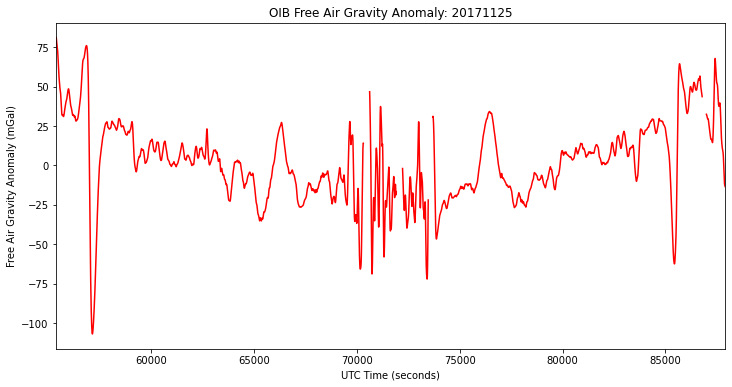

In [7]:
# plot 2D profile of OIB Gravity data from 20171125 OIB flight
fig, ax = plt.subplots()

df_grav_20171125.FAG070.plot(color='red', ax=ax);

ax.set_ylabel('Free Air Gravity Anomaly (mGal)')
ax.set_xlabel('UTC Time (seconds)')
ax.set_title('OIB Free Air Gravity Anomaly: 20171125')
ax.margins(x=0)

## 5.1) Plot Free Air Gravity Anomaly from 20171125 OIB flight over the Venable Ice Shelf, Antarctica

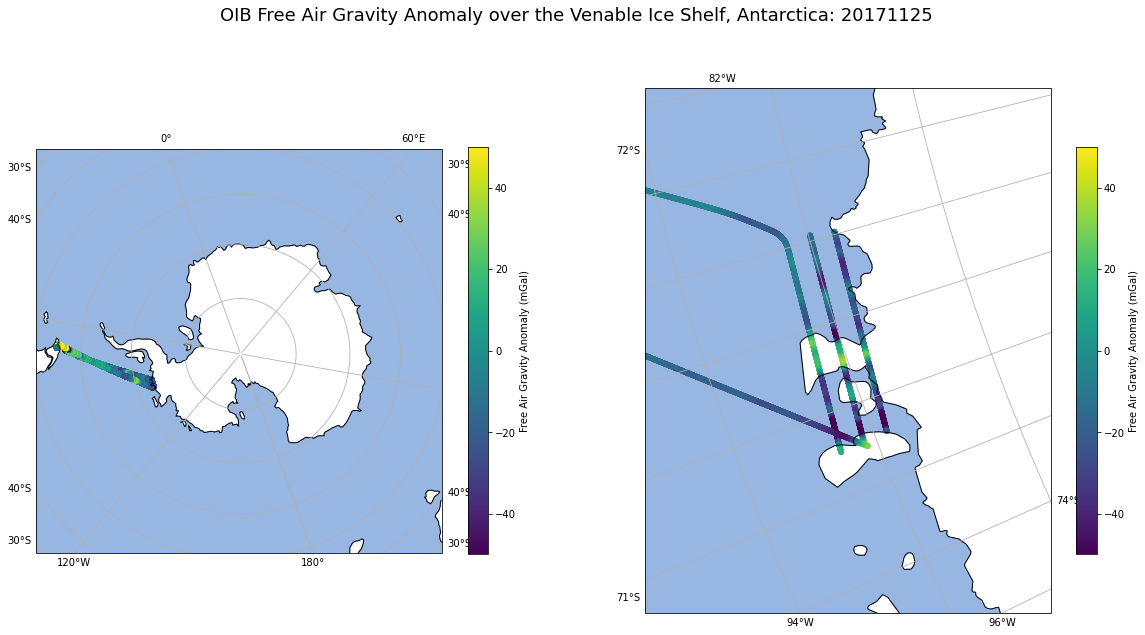

In [8]:
# plot OIB Gravity data from 20171125 OIB flight over the Venable Ice Shelf, Antarctica
central_lat, central_lon = -90, 20

fig, ax = plt.subplots(ncols=2, figsize=(20, 10), subplot_kw={"projection": ccrs.Orthographic(central_lon, central_lat)})

ax[0].set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())
ax[0].coastlines()
ax[0].add_feature(cfeature.OCEAN)
ax[0].gridlines(draw_labels=True); # add labels

df_grav_20171125_scatter = df_grav_20171125.plot(kind='scatter', x='LONG', y='LAT', c='FAG070',
                transform=ccrs.PlateCarree(), ax=ax[0], cmap='viridis',vmin=-50, vmax=50, colorbar=False)

df_grav_20171125_scatter = ax[0].collections[0]
fig.colorbar(df_grav_20171125_scatter, shrink=0.75, label='Free Air Gravity Anomaly (mGal)', ax=ax[0]);

ax[1].set_extent([-94, -83, -72, -74])
ax[1].coastlines()
ax[1].add_feature(cfeature.OCEAN)
ax[1].gridlines(draw_labels=True); # add labels

df_grav_20171125_scatter = df_grav_20171125.plot(kind='scatter', x='LONG', y='LAT', c='FAG070',
                transform=ccrs.PlateCarree(), ax=ax[1],cmap='viridis',vmin=-50, vmax=50, colorbar=False)

df_grav_20171125_scatter = ax[1].collections[0]
fig.colorbar(df_grav_20171125_scatter, shrink=0.75, label='Free Air Gravity Anomaly (mGal)', ax=ax[1]);

fig.suptitle('OIB Free Air Gravity Anomaly over the Venable Ice Shelf, Antarctica: 20171125', fontsize=18);

## 6) Download and load NASA's Operation IceBridge (OIB) MCoRDS L2 Ice Thickness, Version 1
This dataset contains depth sounder measurements of elevation, surface, bottom, and thickness taken from the Multichannel Coherent Radar Depth Sounder (MCoRDS) over Antarctica and Greenland. The data were collected as part of NASA's Operation IceBridge (OIB) Mission.

In [9]:
# download OIB Radar data 
%run Download_Data_Scripts/Download_OIB_MCoRDS_Radar_Data.ipynb

Querying for data:
	https://cmr.earthdata.nasa.gov/search/granules.json?provider=NSIDC_ECS&sort_key[]=start_date&sort_key[]=producer_granule_id&scroll=true&page_size=2000&short_name=IRMCR2&version=001&version=01&version=1&temporal[]=2017-11-25T19:10:01,2017-11-25T20:35:03Z

Found 1 matches.


Earthdata username (or press Return to use a bearer token):  cdieck@ldeo.columbia.edu
password:  ··············


1/2: IRMCR2_20171125_03.csv
  [===============                                             ]  25%  10.9MB/s   [==============================                              ]  50%  17.3MB/s   [=============================================               ]  75%  21.4MB/s   [============================================================] 100%  26.4MB/s   
2/2: IRMCR2_20171125_03.csv.xml
  [============================================================] 100%  7.8MB/s   


In [10]:
# load data OIB Radar *.txt file from 20171125 flight
file_path = 'IRMCR2_20171125_03.csv'
df_radar_20171125 = pd.read_csv(file_path)
df_radar_20171125.head()

,LAT,LON,UTCTIMESOD,THICK,ELEVATION,FRAME,SURFACE,BOTTOM,QUALITY
0,-72.814422,-85.758650,69001.2037,-9999.0,594.9085,2017112503001,-9999.00,-9999.00,1
1,-72.814478,-85.759063,69001.3173,0.0,594.9032,2017112503001,619.57,619.57,1
2,-72.814535,-85.759475,69001.4309,0.0,594.8975,2017112503001,619.57,619.57,1
3,-72.814591,-85.759888,69001.5446,0.0,594.8920,2017112503001,619.57,619.57,1
4,-72.814648,-85.760300,69001.6583,0.0,594.8864,2017112503001,619.57,619.57,1


## 6.1) Clean OIB radar data
Replace -9999 values in SURFACE and BOTTOM columns with NaNs.

In [11]:
# replace -9999 values with NaNs
surface_nodum = df_radar_20171125.SURFACE.replace(-9999,np.nan)
#surface_nodum

bottom_nodum = df_radar_20171125.BOTTOM.replace(-9999,np.nan)
#bottom_nodum

## 6.2) Compute real ice surface and real ice bottom from data

In [12]:
# compute real ice surface
ice_surface = df_radar_20171125.ELEVATION - surface_nodum
#ice_surface

# compute real ice bottom
ice_bottom = df_radar_20171125.ELEVATION - bottom_nodum
#ice_bottom

## 6.3) Add real ice surface and ice bottom columns to OIB radar DataFrame

In [13]:
# add estimate of real ice surface and real ice bottom to df_radar_20171125 DataFrame
df_radar_20171125['ice_surface'] = ice_surface
df_radar_20171125['ice_bottom'] = ice_bottom
df_radar_20171125.head()

,LAT,LON,UTCTIMESOD,THICK,ELEVATION,FRAME,SURFACE,BOTTOM,QUALITY,ice_surface,ice_bottom
0,-72.814422,-85.758650,69001.2037,-9999.0,594.9085,2017112503001,-9999.00,-9999.00,1,NaN,NaN
1,-72.814478,-85.759063,69001.3173,0.0,594.9032,2017112503001,619.57,619.57,1,-24.6668,-24.6668
2,-72.814535,-85.759475,69001.4309,0.0,594.8975,2017112503001,619.57,619.57,1,-24.6725,-24.6725
3,-72.814591,-85.759888,69001.5446,0.0,594.8920,2017112503001,619.57,619.57,1,-24.6780,-24.6780
4,-72.814648,-85.760300,69001.6583,0.0,594.8864,2017112503001,619.57,619.57,1,-24.6836,-24.6836


## 6.4) Round TIME column to one decimal to match time column in gravity DataFrame

In [14]:
TIME = df_radar_20171125.UTCTIMESOD.round(decimals=1)
#TIME

In [15]:
# add estimate of real ice surface and real ice bottom to df_radar_20171125 DataFrame
df_radar_20171125['TIME'] = TIME
df_radar_20171125.head()

,LAT,LON,UTCTIMESOD,THICK,ELEVATION,FRAME,SURFACE,BOTTOM,QUALITY,ice_surface,ice_bottom,TIME
0,-72.814422,-85.758650,69001.2037,-9999.0,594.9085,2017112503001,-9999.00,-9999.00,1,NaN,NaN,69001.2
1,-72.814478,-85.759063,69001.3173,0.0,594.9032,2017112503001,619.57,619.57,1,-24.6668,-24.6668,69001.3
2,-72.814535,-85.759475,69001.4309,0.0,594.8975,2017112503001,619.57,619.57,1,-24.6725,-24.6725,69001.4
3,-72.814591,-85.759888,69001.5446,0.0,594.8920,2017112503001,619.57,619.57,1,-24.6780,-24.6780,69001.5
4,-72.814648,-85.760300,69001.6583,0.0,594.8864,2017112503001,619.57,619.57,1,-24.6836,-24.6836,69001.7


## 6.5) Change the DataFrame index to TIME
TIME in this dataset is UTC Time in second of the day past midnight.

In [16]:
df_radar_20171125 = df_radar_20171125.set_index(['TIME'])
df_radar_20171125.head()

,LAT,LON,UTCTIMESOD,THICK,ELEVATION,FRAME,SURFACE,BOTTOM,QUALITY,ice_surface,ice_bottom
TIME,,,,,,,,,,,
69001.2,-72.814422,-85.758650,69001.2037,-9999.0,594.9085,2017112503001,-9999.00,-9999.00,1,NaN,NaN
69001.3,-72.814478,-85.759063,69001.3173,0.0,594.9032,2017112503001,619.57,619.57,1,-24.6668,-24.6668
69001.4,-72.814535,-85.759475,69001.4309,0.0,594.8975,2017112503001,619.57,619.57,1,-24.6725,-24.6725
69001.5,-72.814591,-85.759888,69001.5446,0.0,594.8920,2017112503001,619.57,619.57,1,-24.6780,-24.6780
69001.7,-72.814648,-85.760300,69001.6583,0.0,594.8864,2017112503001,619.57,619.57,1,-24.6836,-24.6836


## 7) Add real ice surface and ice bottom columns from OIB radar DataFrame to original OIB gravity DataFrame

In [17]:
ice_surface = df_radar_20171125.ice_surface
ice_bottom = df_radar_20171125.ice_bottom

In [18]:
# add estimate of real ice surface and real ice bottom to df_gravity_20171125 DataFrame
df_grav_20171125['ice_surface'] = ice_surface
df_grav_20171125['ice_bottom'] = ice_bottom
df_grav_20171125.head()

,LAT,LONG,DATE,DOY,FLT,PSX,PSY,WGSHGT,FAG070,ice_surface,ice_bottom
TIME,,,,,,,,,,,
50071.0,-54.840927,-68.307024,20171125,329,711,-3660816.17,1456295.83,47.15,NaN,NaN,NaN
50071.5,-54.840927,-68.307025,20171125,329,711,-3660816.17,1456295.80,47.22,NaN,NaN,NaN
50072.0,-54.840927,-68.307025,20171125,329,711,-3660816.16,1456295.78,47.30,NaN,NaN,NaN
50072.5,-54.840927,-68.307025,20171125,329,711,-3660816.17,1456295.75,47.37,NaN,NaN,NaN
50073.0,-54.840927,-68.307026,20171125,329,711,-3660816.18,1456295.74,47.44,NaN,NaN,NaN


## 8) Convert OIB gravity DataFrame to Xarray DataSet

In [19]:
# convert df_grav_20171125 to xarray
ds_grav_20171125 = df_grav_20171125.to_xarray()
ds_grav_20171125

# set coordinates to projected coordinates PSX and PSY
#ds_grav_20171125 = ds_grav_20171125.set_coords(['PSX', 'PSY'])
#ds_grav_20171125

<xarray.Dataset>
Dimensions:      (TIME: 79244)
Coordinates:
  * TIME         (TIME) float64 5.007e+04 5.007e+04 ... 8.969e+04 8.969e+04
Data variables:
    LAT          (TIME) float64 -54.84 -54.84 -54.84 ... -54.84 -54.84 -54.84
    LONG         (TIME) float64 -68.31 -68.31 -68.31 ... -68.31 -68.31 -68.31
    DATE         (TIME) int64 20171125 20171125 20171125 ... 20171125 20171125
    DOY          (TIME) int64 329 329 329 329 329 329 ... 329 329 329 329 329
    FLT          (TIME) int64 711 711 711 711 711 711 ... 711 711 711 711 711
    PSX          (TIME) float64 -3.661e+06 -3.661e+06 ... -3.661e+06 -3.661e+06
    PSY          (TIME) float64 1.456e+06 1.456e+06 ... 1.456e+06 1.456e+06
    WGSHGT       (TIME) float64 47.15 47.22 47.3 47.37 ... 43.98 43.9 43.82
    FAG070       (TIME) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    ice_surface  (TIME) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    ice_bottom   (TIME) float64 nan nan nan nan nan nan ... nan nan nan nan nan

## 9) Download and load MEaSUREs BedMachine Antarctica, Version 2
This dataset contains a bed topography/bathymetry map of Antarctica collected as part of the NASA Making Earth System Data Records for Use in Research Environments (MEaSUREs) program.

In [20]:
# download bedmachine2 dataset
%run Download_Data_Scripts/Download_Bedmachine2.ipynb

Querying for data:
	https://cmr.earthdata.nasa.gov/search/granules.json?provider=NSIDC_ECS&sort_key[]=start_date&sort_key[]=producer_granule_id&scroll=true&page_size=2000&short_name=NSIDC-0756&version=002&version=02&version=2&temporal[]=1970-01-01T00:00:00Z,2019-10-01T23:59:59Z

Found 1 matches.


Earthdata username (or press Return to use a bearer token):  cdieck@ldeo.columbia.edu
password:  ··············


1/2: BedMachineAntarctica_2020-07-15_v02.nc
  [                                                            ]   0%  14.7MB/s   [                                                            ]   0%  21.4MB/s   [                                                            ]   0%  24.4MB/s   [                                                            ]   1%  27.0MB/s   [                                                            ]   1%  28.9MB/s   [                                                            ]   1%  30.4MB/s   [=                                                           ]   1%  30.9MB/s   [=                                                           ]   1%  31.8MB/s   [=                                                           ]   1%  32.5MB/s   [=                                                           ]   1%  32.9MB/s   [=                                                           ]   1%  33.3MB/s   [=                                                           ]   2%  33.7M

In [21]:
# load Bedmachine2 data into xarray dataset
ds_bedmachine2 = xr.open_dataset('BedMachineAntarctica_2020-07-15_v02.nc')
ds_bedmachine2

<xarray.Dataset>
Dimensions:    (x: 13333, y: 13333)
Coordinates:
  * x          (x) int32 -3333000 -3332500 -3332000 ... 3332000 3332500 3333000
  * y          (y) int32 3333000 3332500 3332000 ... -3332000 -3332500 -3333000
Data variables:
    mapping    |S1 ...
    mask       (y, x) int8 ...
    firn       (y, x) float32 ...
    surface    (y, x) float32 ...
    thickness  (y, x) float32 ...
    bed        (y, x) float32 ...
    errbed     (y, x) float32 ...
    source     (y, x) int8 ...
    geoid      (y, x) int16 ...
Attributes: (12/17)
    Conventions:                 CF-1.7
    Title:                       BedMachine Antarctica
    Author:                      Mathieu Morlighem
    version:                     15-Jul-2020 (v2.0)
    nx:                          13333.0
    ny:                          13333.0
    ...                          ...
    ymax:                        3333000
    spacing:                     500
    no_data:                     -9999.0
    license:                     No restrictions on access or use
    Data_citation:               Morlighem M. et al., (2019), Deep glacial tr...
    Notes:                       Data processed at the Department of Earth Sy...

In [22]:
# keep attributes for bedmachine2
xr.set_options(keep_attrs=True);

## 9.1) Convert BedMachine2 heights from geoid to WGS84 ellipsoid
BedMachine2 heights are referenced to mean sea level using the geoid EIGEN-6C4. OIB heights are referenced to the WGS84 ellipsoid using the GRS80 ellipsoid. To convert the BedMachine heights to heights that are referenced to the WGS84 ellipsoid add the BedMachine2 heights to the Bedmachine2 geoid height data variable.

$\\h_{ellipsoid} = h_{geoid} + geoid$

In [23]:
# convert to WGS84
bedmachine2_bed_wgs84 = ds_bedmachine2.bed + ds_bedmachine2.geoid
bedmachine2_bed_wgs84

<xarray.DataArray (y: 13333, x: 13333)>
array([[-5916.617 , -5921.465 , -5926.9243, ..., -3913.8013, -3920.2   ,
        -3925.7112],
       [-5912.459 , -5917.895 , -5923.3633, ..., -3918.9165, -3925.2678,
        -3925.4158],
       [-5908.493 , -5913.9136, -5919.6826, ..., -3927.6636, -3930.2397,
        -3930.1514],
       ...,
       [-4595.2627, -4578.1523, -4576.563 , ..., -3683.574 , -3684.6995,
        -3684.4336],
       [-4610.7437, -4594.5767, -4600.6787, ..., -3681.833 , -3684.6228,
        -3684.4285],
       [-4633.141 , -4627.0723, -4633.0103, ..., -3679.7668, -3682.6243,
        -3683.8645]], dtype=float32)
Coordinates:
  * x        (x) int32 -3333000 -3332500 -3332000 ... 3332000 3332500 3333000
  * y        (y) int32 3333000 3332500 3332000 ... -3332000 -3332500 -3333000
Attributes:
    long_name:      bed topography
    standard_name:  bedrock_altitude
    units:          meters
    grid_mapping:   mapping
    source:         IBCSO and Mathieu Morlighem

## 9.2) Add BedMachine2 heights referenced to the WGS84 ellipsoid to BedMachine2 DataSet as new data variable

In [24]:
# add bedmachine2_bed_wgs84 to DataSet
ds_bedmachine2 = ds_bedmachine2.assign(bed_wgs84=bedmachine2_bed_wgs84)
ds_bedmachine2

<xarray.Dataset>
Dimensions:    (x: 13333, y: 13333)
Coordinates:
  * x          (x) int32 -3333000 -3332500 -3332000 ... 3332000 3332500 3333000
  * y          (y) int32 3333000 3332500 3332000 ... -3332000 -3332500 -3333000
Data variables:
    mapping    |S1 b''
    mask       (y, x) int8 ...
    firn       (y, x) float32 ...
    surface    (y, x) float32 ...
    thickness  (y, x) float32 ...
    bed        (y, x) float32 ...
    errbed     (y, x) float32 ...
    source     (y, x) int8 ...
    geoid      (y, x) int16 ...
    bed_wgs84  (y, x) float32 -5.917e+03 -5.921e+03 ... -3.683e+03 -3.684e+03
Attributes: (12/17)
    Conventions:                 CF-1.7
    Title:                       BedMachine Antarctica
    Author:                      Mathieu Morlighem
    version:                     15-Jul-2020 (v2.0)
    nx:                          13333.0
    ny:                          13333.0
    ...                          ...
    ymax:                        3333000
    spacing:                     500
    no_data:                     -9999.0
    license:                     No restrictions on access or use
    Data_citation:               Morlighem M. et al., (2019), Deep glacial tr...
    Notes:                       Data processed at the Department of Earth Sy...

## 10) Create subset DataArray of BedMachine2 bed topography data variable that is referenced to the WGS84 ellipsoid

In [25]:
# create subset DataArray of bedmachine2 bed_wgs84 data variable
bedmachine2_bed = ds_bedmachine2.bed_wgs84
bedmachine2_bed

<xarray.DataArray 'bed_wgs84' (y: 13333, x: 13333)>
array([[-5916.617 , -5921.465 , -5926.9243, ..., -3913.8013, -3920.2   ,
        -3925.7112],
       [-5912.459 , -5917.895 , -5923.3633, ..., -3918.9165, -3925.2678,
        -3925.4158],
       [-5908.493 , -5913.9136, -5919.6826, ..., -3927.6636, -3930.2397,
        -3930.1514],
       ...,
       [-4595.2627, -4578.1523, -4576.563 , ..., -3683.574 , -3684.6995,
        -3684.4336],
       [-4610.7437, -4594.5767, -4600.6787, ..., -3681.833 , -3684.6228,
        -3684.4285],
       [-4633.141 , -4627.0723, -4633.0103, ..., -3679.7668, -3682.6243,
        -3683.8645]], dtype=float32)
Coordinates:
  * x        (x) int32 -3333000 -3332500 -3332000 ... 3332000 3332500 3333000
  * y        (y) int32 3333000 3332500 3332000 ... -3332000 -3332500 -3333000
Attributes:
    long_name:      bed topography
    standard_name:  bedrock_altitude
    units:          meters
    grid_mapping:   mapping
    source:         IBCSO and Mathieu Morlighem

## 11) Use advanced interpolation to sample BedMachine2 WGS84 bed topography data onto OIB 20171125 survey lines

In [26]:
# designate axis for sampling bedmachine2 bed DataArray onto OIB survey line
x = ds_grav_20171125.PSX
y = ds_grav_20171125.PSY

In [27]:
# sample bedmachine2 bed DataArray along OIB survey line
bedmachine2_bed = bedmachine2_bed.interp(x=x,y=y)
bedmachine2_bed

<xarray.DataArray 'bed_wgs84' (TIME: 79244)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
    x        (TIME) float64 -3.661e+06 -3.661e+06 ... -3.661e+06 -3.661e+06
    y        (TIME) float64 1.456e+06 1.456e+06 ... 1.456e+06 1.456e+06
  * TIME     (TIME) float64 5.007e+04 5.007e+04 ... 8.969e+04 8.969e+04
Attributes:
    long_name:      bed topography
    standard_name:  bedrock_altitude
    units:          meters
    grid_mapping:   mapping
    source:         IBCSO and Mathieu Morlighem

## 12) Plot sampled BedMachine2 WGS84 Bed Topography along 20171125 OIB flight

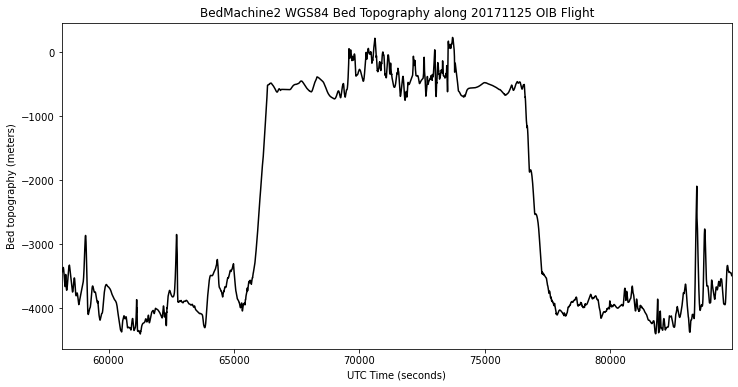

In [40]:
# plot bedmachine2 bed wgs84 topography along 20171125 flight 
fig, ax = plt.subplots()

bedmachine2_bed.plot(color='black', ax=ax);

ax.set_ylabel('Bed topography (meters)')
ax.set_xlabel('UTC Time (seconds)')
ax.set_title('BedMachine2 WGS84 Bed Topography along 20171125 OIB Flight')
ax.margins(x=0)

## 13) Convert BedMachine2 WGS84 Bed Topography DataArray to DataFrame

In [29]:
# convert bedmachine2_bed to DataFrame
df_bedmachine2_bed = bedmachine2_bed.to_dataframe()
df_bedmachine2_bed.head()

,x,y,bed_wgs84
TIME,,,
50071.0,-3660816.17,1456295.83,NaN
50071.5,-3660816.17,1456295.80,NaN
50072.0,-3660816.16,1456295.78,NaN
50072.5,-3660816.17,1456295.75,NaN
50073.0,-3660816.18,1456295.74,NaN


## 14) Add BedMachine2 WGS84 Bed Topography to original OIB gravity data DataFrame as a new column

In [30]:
# add bed_wgs84 to original OIB gravity DataFrame
bed_topo_20171125 = df_bedmachine2_bed["bed_wgs84"]
df_grav_20171125_bed = df_grav_20171125.join(bed_topo_20171125)
df_grav_20171125_bed.head()

,LAT,LONG,DATE,DOY,FLT,PSX,PSY,WGSHGT,FAG070,ice_surface,ice_bottom,bed_wgs84
TIME,,,,,,,,,,,,
50071.0,-54.840927,-68.307024,20171125,329,711,-3660816.17,1456295.83,47.15,NaN,NaN,NaN,NaN
50071.5,-54.840927,-68.307025,20171125,329,711,-3660816.17,1456295.80,47.22,NaN,NaN,NaN,NaN
50072.0,-54.840927,-68.307025,20171125,329,711,-3660816.16,1456295.78,47.30,NaN,NaN,NaN,NaN
50072.5,-54.840927,-68.307025,20171125,329,711,-3660816.17,1456295.75,47.37,NaN,NaN,NaN,NaN
50073.0,-54.840927,-68.307026,20171125,329,711,-3660816.18,1456295.74,47.44,NaN,NaN,NaN,NaN


## 15) Subset OIB gravity data DataFrame to airborne survey lines over the Venable Ice Shelf, Antarctica

In [31]:
# # create subset of OIB gravity DataFrame along survey lines over the Venable Ice Shelf
# df_grav_20171125_bed_survey = df_grav_20171125_bed[df_grav_20171125_bed.index > 37900] # subset dataset by survey line
# df_grav_20171125_bed_survey = df_grav_20171125_bed_survey[df_grav_20171125_bed_survey.index < 46800] # subset dataset by survey line
# df_grav_20171125_bed_survey.head()

# df_grav_20171125.index[37900]
# df_grav_20171125.index[46800]

In [32]:
# create subset of OIB gravity DataFrame along survey lines over the Venable Ice Shelf
df_grav_20171125_bed_survey = df_grav_20171125_bed[df_grav_20171125_bed.index > 69021] # subset dataset by survey line
df_grav_20171125_bed_survey = df_grav_20171125_bed_survey[df_grav_20171125_bed_survey.index < 73471] # subset dataset by survey line
df_grav_20171125_bed_survey.head()

,LAT,LONG,DATE,DOY,FLT,PSX,PSY,WGSHGT,FAG070,ice_surface,ice_bottom,bed_wgs84
TIME,,,,,,,,,,,,
69021.5,-72.822916,-85.834019,20171125,329,711,-1874905.43,136565.27,597.47,-12.91,-25.8862,-25.8862,-728.674007
69022.0,-72.823077,-85.835919,20171125,329,711,-1874892.10,136501.81,597.44,-12.85,-25.9078,-25.9078,-728.579823
69022.5,-72.823236,-85.837821,20171125,329,711,-1874879.03,136438.30,597.42,-12.80,-25.9181,-25.9181,-728.455699
69023.0,-72.823392,-85.839724,20171125,329,711,-1874866.24,136374.76,597.42,-12.75,NaN,NaN,-728.326374
69023.5,-72.823546,-85.841629,20171125,329,711,-1874853.73,136311.19,597.42,-12.70,-25.9235,-25.9235,-728.192721


## 16) Plot Airborne Survey Height in meters above the GRS80 Ellipsoid of subset survey lines OIB gravity DataFrame over original OIB gravity data DataFrame

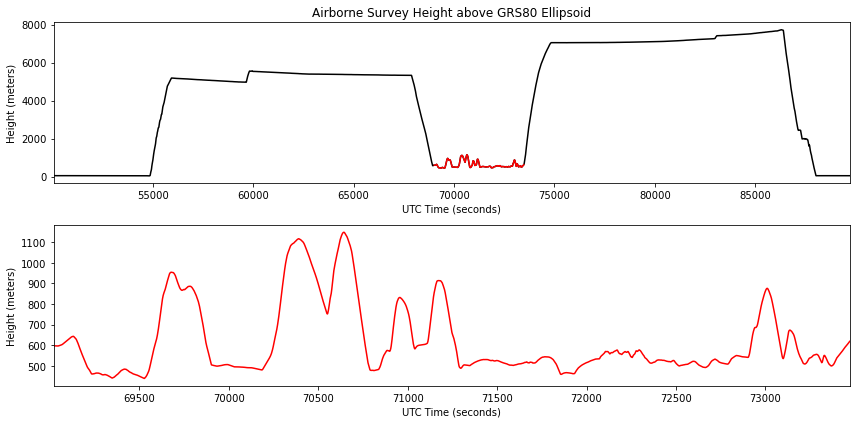

In [41]:
# plot survey height to visualize survey line subset
fig, ax = plt.subplots(nrows=2, figsize=(12,6))

df_grav_20171125_bed.WGSHGT.plot(color='black', ax=ax[0]);
df_grav_20171125_bed_survey.WGSHGT.plot(color='red', ax=ax[0]);

ax[0].set_ylabel('Height (meters)')
ax[0].set_xlabel('UTC Time (seconds)')
ax[0].set_title('Airborne Survey Height above GRS80 Ellipsoid')
#ax[0].set_xlim(min(df_grav_20171125_bed.index), max(df_grav_20171125_bed.index));
ax[0].margins(x=0)
#ax[0].set_xticklabels([])

df_grav_20171125_bed_survey.WGSHGT.plot(color='red', ax=ax[1]);

ax[1].set_ylabel('Height (meters)')
ax[1].set_xlabel('UTC Time (seconds)')
#ax[1].set_title('Airborne Survey Height above GRS80 Ellipsoid')
#ax[1].set_xlim(min(df_grav_20171125_bed_survey.index), max(df_grav_20171125_bed_survey.index));
ax[1].margins(x=0)

# format panels to fit together better in figure
fig.tight_layout()

## 17) Apply algorithm described in the supplementary materials of Hodgson et al. 2019. to estimate the bathymetry/bed topography beneath the Venable Ice Shelf in Antarctica with OIB airborne gravity data

Equations and variable used for computation:

$\rho _w= water \: density = 1.028 \: g/cm^3\\
\rho _r= average \: crustal \: rock = 2.67 \: g/cm^3$

$Bouguer \: Correction \: (BC)\\
Initial \: Known \: Topography \: (h) \\
Bouguer \: Gravity \: Anomaly \: (BA)\\
Free \: Air \: Gravity \: Anomaly \: (FAA)\\
Gravity \: Improved \: Topography \: Estimate \:(GTopo)$

$BC = 2\pi \rho G h \: = 0.0419088 \cdot (\rho _w-\rho _r) \cdot h \\
BA = FAA - BC\\
GTopo = BA \: / \: (\rho _r-\rho _w) \cdot 0.0419088$

## 17.1) Compute Bouguer Correction
The Bouguer correction accounts for the 3D gravity effect of BedMachine2 WGS84 Bed Topography (Hodgson et al., 2019).

In [34]:
# compute bouguer correction (m to mGal)
pw = 1.028 # water density (g/cm^3)
pr = 2.67 # rock density (g/cm^3)
bcv = 0.0419088
h = df_grav_20171125_bed_survey.bed_wgs84

bc = bcv*(pw-pr)*h
#bc

## 17.2) Compute Bouguer Gravity Anomaly
The Bouguer gravity anomaly contains signals caused by variations in crustal thickness, shallow geological bodies with distinct densities, and errors in the input topographic data (Hodgson et al., 2019).

In [35]:
# compute bouguer anomaly (mGal)
faa = df_grav_20171125_bed_survey.FAG070

ba = faa - bc
#ba

## 17.3) Compute estimate of gravity improved topography
The bouguer gravity anomaly contains signals caused by variations in crustal thickness, shallow geological bodies with distinct densities, and errors in the input topographic data (Hodgson et al., 2019).

In [36]:
# compute estimate of gravity improved topography (mGal to m)
gtopo = ba/((pr-pw)*bcv)
#gtopo

In [37]:
# add estimate of gravity improved topography/bathymetry to df_grav_20171125_bed_survey DataFrame
df_grav_20171125_bed_survey['gtopo'] = gtopo
df_grav_20171125_bed_survey.head()

,LAT,LONG,DATE,DOY,FLT,PSX,PSY,WGSHGT,FAG070,ice_surface,ice_bottom,bed_wgs84,gtopo
TIME,,,,,,,,,,,,,
69021.5,-72.822916,-85.834019,20171125,329,711,-1874905.43,136565.27,597.47,-12.91,-25.8862,-25.8862,-728.674007,-916.280499
69022.0,-72.823077,-85.835919,20171125,329,711,-1874892.10,136501.81,597.44,-12.85,-25.9078,-25.9078,-728.579823,-915.314403
69022.5,-72.823236,-85.837821,20171125,329,711,-1874879.03,136438.30,597.42,-12.80,-25.9181,-25.9181,-728.455699,-914.463685
69023.0,-72.823392,-85.839724,20171125,329,711,-1874866.24,136374.76,597.42,-12.75,NaN,NaN,-728.326374,-913.607767
69023.5,-72.823546,-85.841629,20171125,329,711,-1874853.73,136311.19,597.42,-12.70,-25.9235,-25.9235,-728.192721,-912.747520


## 18) Plot 2D profile of BedMachine2 WGS84 Bed Topography and the estimate of Gravity Improved Bed Topography over the Venable Ice Shelf, Antarctica

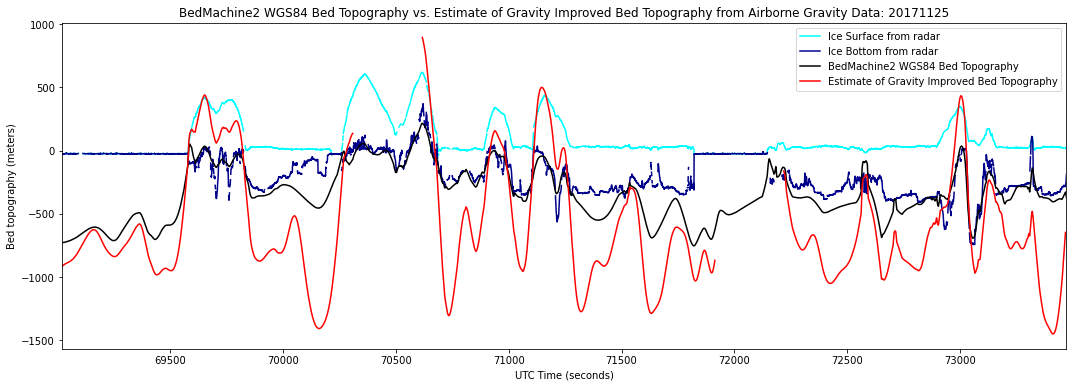

In [42]:
# plot BedMachine2 WGS84 Bed Topography and Estimate Gravity Improved Bed Topography
fig, ax = plt.subplots(figsize=(18,6))

df_grav_20171125_bed_survey.ice_surface.plot(color='cyan', ax=ax, label='Ice Surface from radar');
df_grav_20171125_bed_survey.ice_bottom.plot(color='darkblue', ax=ax, label='Ice Bottom from radar');
df_grav_20171125_bed_survey.bed_wgs84.plot(color='black', ax=ax, label='BedMachine2 WGS84 Bed Topography');
df_grav_20171125_bed_survey.gtopo.plot(color='red', ax=ax, label='Estimate of Gravity Improved Bed Topography');

ax.set_ylabel('Bed topography (meters)')
ax.set_xlabel('UTC Time (seconds)')
ax.set_title('BedMachine2 WGS84 Bed Topography vs. Estimate of Gravity Improved Bed Topography from Airborne Gravity Data: 20171125')
ax.set_xlim(min(df_grav_20171125_bed_survey.index), max(df_grav_20171125_bed_survey.index))
ax.legend(loc=1);

## 18.1) Plot BedMachine2 WGS84 Bed Topography and the estimate of Gravity Improved Bed Topography over the Venable Ice Shelf, Antarctica

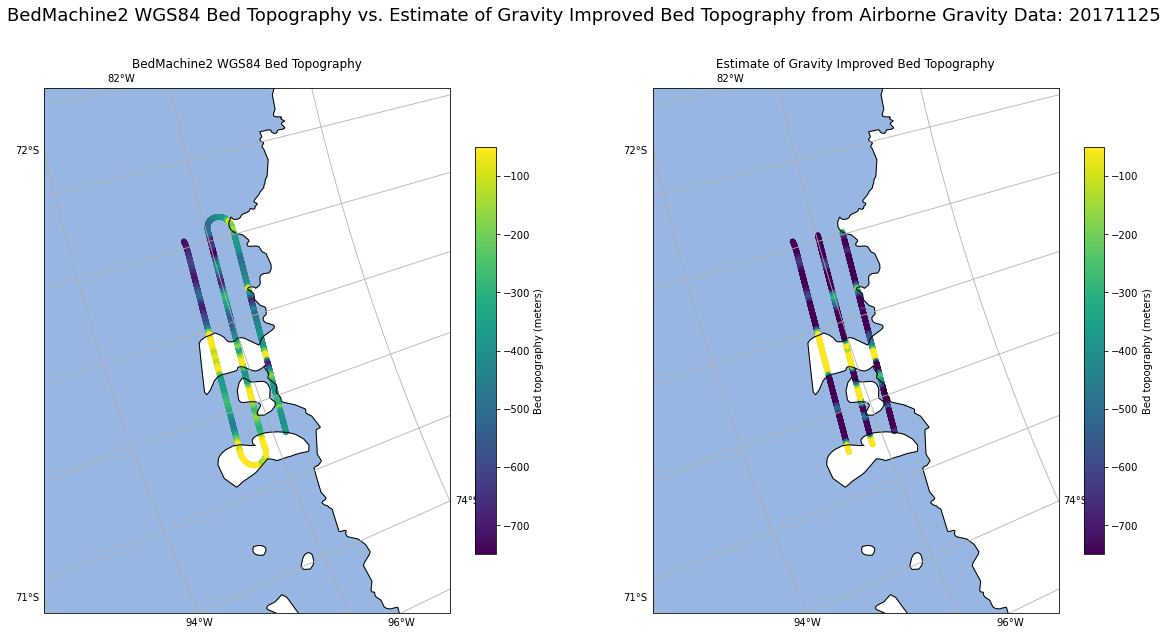

In [39]:
# plot BedMachine2 WGS84 Bed Topography and Estimate Gravity Improved Bed Topography
central_lat, central_lon = -90, 20

fig, ax = plt.subplots(ncols=2, figsize=(20, 10), subplot_kw={"projection": ccrs.Orthographic(central_lon, central_lat)})

ax[0].set_extent([-94, -83, -72, -74])
ax[0].coastlines()
ax[0].add_feature(cfeature.OCEAN)
ax[0].gridlines(draw_labels=True); # add labels

df_grav_20171125_scatter = df_grav_20171125_bed_survey.plot(kind='scatter', x='LONG', y='LAT', c='bed_wgs84',
                transform=ccrs.PlateCarree(), ax=ax[0],
                title = "BedMachine2 WGS84 Bed Topography", cmap='viridis',vmin=-750, vmax=-50, colorbar=False)

df_grav_20171125_scatter = ax[0].collections[0]
fig.colorbar(df_grav_20171125_scatter, shrink=0.75, label='Bed topography (meters)', ax=ax[0]);


ax[1].set_extent([-94, -83, -72, -74])
ax[1].coastlines()
ax[1].add_feature(cfeature.OCEAN)
ax[1].gridlines(draw_labels=True); # add labels

df_grav_20171125_scatter = df_grav_20171125_bed_survey.plot(kind='scatter', x='LONG', y='LAT', c='gtopo',
                transform=ccrs.PlateCarree(), ax=ax[1],
                title = "Estimate of Gravity Improved Bed Topography", cmap='viridis',vmin=-750, vmax=-50, colorbar=False)

df_grav_20171125_scatter = ax[1].collections[0]
fig.colorbar(df_grav_20171125_scatter, shrink=0.75, label='Bed topography (meters)', ax=ax[1]);

fig.suptitle('BedMachine2 WGS84 Bed Topography vs. Estimate of Gravity Improved Bed Topography from Airborne Gravity Data: 20171125', fontsize=18);